In [42]:
# Miscellaneous
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud

# Sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Libraries for NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# custom methods
from utils import category_ngram, plot_history, plot_cmatrix, display_wordcloud

# Others
import os
import re

# Seaborn style
sns.set_style('whitegrid')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sherlock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sherlock/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Dataset Description

The file contains 202,372 records. Each json record contains following attributes:

-  `category`: Category article belongs to
-  `headline`: Headline of the article 
-  `authors`: Person authored the article
-  `link`: Link to the post
-  `short_description`: Short description of the article
-  `date`: Date the article was published

The next step is to load the dataset

In [2]:
# Loading the dataset
news_category = pd.read_json('dataset/News_Category_Dataset_v2.json', lines=True)
print(news_category.shape)
news_category.head()

(200853, 6)


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


This dataset contains a total of 6 features and 200853 samples.

For a further dig into the dataset, the function ``describe`` of pandas is used. There we can see samples the number of unique categories which are 41. Additionally, It is possible to see that there are repeated headlines, authord and short_descriptions. The last information will be used to filter the dataset.

In [3]:
# Describe info of the dataset
news_category.describe()

<ipython-input-3-c99a2d68ffff>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  news_category.describe()


,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.newre...,,2013-01-17 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


Another important step is to check for Null or NaN values. Although it was already seen with the `describe` method that there is not NaN, The following cell prints the sum of NaN in the dataset.

In [4]:
# Checking for NaNs
news_category.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

The next cell prints all the categories within the dataset, this is a very good insight about the number of categories and their names.

In [5]:
# Print unique categories
print('The Categories in the dataset are: \n')
print(news_category.category.unique())
print('The total number of features are: {}'.format(len(news_category.category.unique())))

The Categories in the dataset are: 

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']
The total number of features are: 41


To following cell prints a short description's example.

In [6]:
print('A short description: {}'.format(news_category.iloc[7]["short_description"]))

A short description: There's a great mini-series joining this week.


## Visualizing data

To gain more insights about the dataset, I will plot the number of samples belonging to an specific category in a barplot. This will plot will show if the datasetet is balanced.

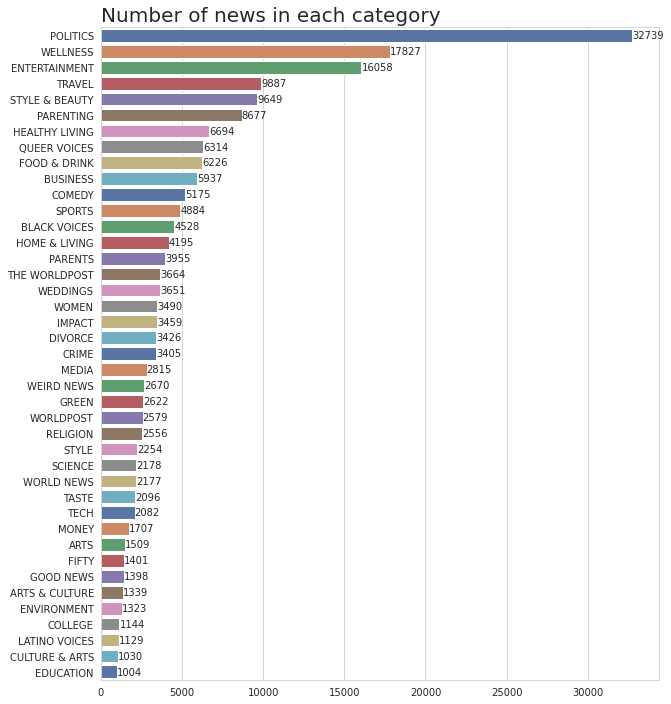

In [7]:
# Create new dataframe
bars_df = pd.DataFrame(news_category['category'].value_counts()).reset_index()
# Plotting
plt.figure(figsize=(10, 12))
bars = sns.barplot(data = bars_df, y = 'index', x = 'category', palette='deep')
plt.title('Number of news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
ax = bars
# Adding values in each bar 
# https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
    
plt.show()

From the last plot we can see that the `category` "Politics" is the most common one in the dataset. Moreover, the category with less samples is `Education`, however, it seems to be a reasonable value to train a neural network. The last Barplot give us considerable good insights about what are the most frequent categories.

Another interesting insight would be the average lenght of the `headlines` and `descriptions` in the dataset, to do so, a probability, dense function will be plotted for each of these features.

In [60]:
# Use plotly to see the distribution of categorical data
fig = ff.create_distplot([news_category['headline'].str.len()], ["ht"], show_hist=False, show_rug=False)
fig['layout'].update(title={'text':'Relative frequence - Headline lenght', 'y':0.9, 'x':0.5, 'xanchor': 'center','yanchor': 'top'}, xaxis_title="Length of a headline",yaxis_title="probability")
fig.update_layout(showlegend = False, width=500,height=500)
fig.show()

Similarly, it is also possible to plot the lenght of the `short_description`.

In [61]:
# Use plotly to see the distribution of categorical data
# https://www.kaggle.com/vikashrajluhaniwal/recommending-news-articles-based-on-read-articles#6.-Headline-based-similarity-on-new-articles
fig = ff.create_distplot([news_category['short_description'].str.len()], ["ht"], show_hist=False, show_rug=False)
fig['layout'].update(title={'text':'Relative frequence - Description lenght', 'y':0.9, 'x':0.5, 'xanchor': 'center','yanchor': 'top'}, xaxis_title="Length of Description",yaxis_title="probability")
fig.update_layout(showlegend = False, width=500,height=500)
fig.show()

From the past two plots it is possible to see that the text's lenght in the `headline` and in the `short_description` are quite different. Generally, the text in the descripwion is way longer and may provide more information for a classification task.

## Filtering the dataset

The following cells will be used to filter the text within the `headline` and `short_description` features. 

These lines of code are for testing purpose, and filter the dataset based on the most recent data. The resulting dataset will be stored in a different dataframe called `news_articles`.

In [10]:
# Filter dataset by date
f_articles = news_category[news_category['date'] >= pd.Timestamp(2017,5,5)]
#f_articles = news_category.copy()
print('The shape of the filtered dataset is: {}'.format(f_articles.shape))

The shape of the filtered dataset is: (27487, 6)


One Dwarback from the past lines are that the dataset now has less categories. To validate this, the next cell prints the new list of categories.

In [11]:
# Print unique categories
print('The Categories in the dataset are: \n')
print(f_articles.category.unique())
print('The total number of features are: {}'.format(len(f_articles.category.unique())))

The Categories in the dataset are: 

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS']
The total number of features are: 28


An important step is to remove headlines and descriptions with less than five words. Additionally, as mentioned before there are repeated headlines and short descriptions, an important step is to remove these repeated texts.

In [12]:
# Filter headlines with less than 5 characters
f_articles = f_articles[f_articles['headline'].apply(lambda x: len(x.split())>5)]
f_articles = f_articles[f_articles['short_description'].apply(lambda x: len(x.split())>5)]
# Filter headlines in a descending manner
f_articles.sort_values('headline',inplace=True, ascending=False)
# Make a copy of the dataset
duplicated_headlines_series = f_articles.duplicated('headline', keep = False)
# Remove repeated headlines 
news_articles = f_articles[~duplicated_headlines_series]
# Make another copy of the dataset
duplicated_description_series = f_articles.duplicated('short_description', keep = False)
# Remove repeated descriptions 
news_articles = f_articles[~duplicated_description_series]
print("Total number of articles after removing duplicates (headlines):", f_articles.shape[0])

Total number of articles after removing duplicates (headlines): 24274


In [13]:
print("Total number of articles : ", f_articles.shape[0])
print("Total number of authors : ", f_articles["authors"].nunique())
print("Total number of unqiue categories : ", f_articles["category"].nunique())

Total number of articles :  24274
Total number of authors :  3922
Total number of unqiue categories :  28


It is interesting thing to visualize is the number of articles per date, the next cell shows the aforementioned.

In [14]:
# Articles per month
news_articles_per_month = f_articles.resample('m', on = 'date')['category'].count()
news_articles_per_month

date
2017-05-31    2006
2017-06-30    2273
2017-07-31    2129
2017-08-31    2254
2017-09-30    2027
2017-10-31    2084
2017-11-30    1934
2017-12-31    1765
2018-01-31    1856
2018-02-28    1543
2018-03-31    1652
2018-04-30    1480
2018-05-31    1271
Freq: M, Name: category, dtype: int64

Now is time to remove the stopwords, as this is a dataset in English, I will use the stopwords provided in the library `stopwords`

In [15]:
# remove stop words
stop_words = set(stopwords.words('english'))
# List of stopwords to filter
print(stop_words)

{"couldn't", 'needn', 'by', 'below', 'an', 'this', 'a', 'couldn', 'as', "hasn't", 'was', 'in', 'shouldn', 'the', 'our', 'you', 'own', 'while', 'both', "she's", "you've", 'off', 'just', "won't", 'did', 'against', 'doing', 'same', 'have', 'my', 're', 'themselves', 'where', 'me', 'be', 'there', 'these', 'don', "wouldn't", 'here', 'it', 'when', 'she', 'to', 'didn', "you'd", 'isn', 'above', 'few', "doesn't", "weren't", 'on', "you'll", 'is', 'them', "needn't", 'he', 'further', "should've", 'having', 'ourselves', 'during', 'down', 'mightn', 'their', 'not', 'has', 'ours', 'but', 'only', 'over', 'with', 'very', 'y', "mightn't", 'such', 'no', 'your', 'mustn', 'had', 'we', 'does', 'its', 'd', 'haven', 'some', 'theirs', 'then', 'doesn', 'myself', 'more', 'do', "hadn't", "isn't", 'been', 'wasn', 'wouldn', 'if', 'ma', 'which', 't', 'before', 'now', 'hasn', "didn't", 'under', 'most', 've', 'am', 'all', 'are', 'because', 'hers', 'won', "that'll", "you're", 'after', 'ain', 'itself', 'other', 'aren', 'h

The following functions are used to create some filters for the dataset. The method `remove_stopwords` is used to remove stop words, `alpha_num` removes any character that is not alphanumeric, finally, rem_lemmatizer converts the words to its base form. These three basic filters are very extremely useful when processing text within a dataset and can considerable improve performance.

In [16]:
# Removing stopwords
def remove_stopwords(text):
    final_text = []
    # Split text
    for i in text.split():
        # Check if word is not in stopword, otherwise do not append
        if i.strip().lower() not in stop_words:
            final_text.append(i.strip())
    return " ".join(final_text)

In [17]:
# Remove non alphanumeric characters
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

In [18]:
# Lemmatize words to its base form
# https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
lemmatizer = WordNetLemmatizer()
def rem_lemmatizer(text):
    final_text = []
    string_l = ""
    for w in word_tokenize(text):
        string_l += lemmatizer.lemmatize(w, pos = "v") + " "
    final_text.append(string_l.strip())
    return " ".join(final_text)

Once our filters are defined it is time to apply it to the dataset to the `headline`, `short_description` and `category` features. One step that is doing inplace is to convert all the caracters to lowercase. When the dataset is showed, it is possible to validate how all the filters are successfully applied.

In [19]:
# Headline filtering
# Lowercase
f_articles['headline'] = f_articles['headline'].str.lower()
# Remove stopwords
f_articles['headline'] = f_articles['headline'].apply(remove_stopwords)
# Remove non alphanumerics
f_articles['headline'] = f_articles['headline'].apply(alpha_num)
# Lemmatizer
f_articles['headline'] = f_articles['headline'].apply(rem_lemmatizer)

# Description filtering
f_articles['short_description'] = f_articles['short_description'].str.lower()
f_articles['short_description'] = f_articles['short_description'].apply(remove_stopwords)
f_articles['short_description'] = f_articles['short_description'].apply(alpha_num)
f_articles['short_description'] = f_articles['short_description'].apply(rem_lemmatizer)
# Category (lowercase)
f_articles['category'] = f_articles['category'].str.lower()

f_articles.head()

,category,headline,authors,link,short_description,date
21194,healthy living,to bone didnt teach glamour teach respect,"Mycah Hazel, Contributorblogger, equal opportu...",https://www.huffingtonpost.com/entry/to-the-bo...,oftentimes film tv show eat disorder try convi...,2017-07-18
2932,queer voices,will grace creator donate gay bunny book every...,Elyse Wanshel,https://www.huffingtonpost.com/entry/will-grac...,lot easier kid mike pences home state read a d...,2018-04-02
25186,world news,we blood invisible live indias dalit women,"Sara Hylton, Women & Girls Hub",https://www.huffingtonpost.com/entry/we-are-th...,girl dalit village harirajpur odisha chase kit...,2017-05-31
26210,politics,wannacry ransomware attack raise alarm bell ci...,"Stateline, ContributorStateline provides daily...",https://www.huffingtonpost.com/entry/wannacry-...,recent global cyberattack spar federal governm...,2017-05-19
20973,entertainment,walk dead reportedly cancel comiccon press eve...,Bill Bradley,https://www.huffingtonpost.com/entry/walking-d...,panel still happen,2017-07-20


To simplify the problem the `headline` and `short_description` text are blended together and used as a unified feature. This new feature is called `full_text`.

In [20]:
# Combining text
f_articles["full_text"] = f_articles["headline"].map(str) + " " + f_articles["short_description"]
f_articles.head()

,category,headline,authors,link,short_description,date,full_text
21194,healthy living,to bone didnt teach glamour teach respect,"Mycah Hazel, Contributorblogger, equal opportu...",https://www.huffingtonpost.com/entry/to-the-bo...,oftentimes film tv show eat disorder try convi...,2017-07-18,to bone didnt teach glamour teach respect ofte...
2932,queer voices,will grace creator donate gay bunny book every...,Elyse Wanshel,https://www.huffingtonpost.com/entry/will-grac...,lot easier kid mike pences home state read a d...,2018-04-02,will grace creator donate gay bunny book every...
25186,world news,we blood invisible live indias dalit women,"Sara Hylton, Women & Girls Hub",https://www.huffingtonpost.com/entry/we-are-th...,girl dalit village harirajpur odisha chase kit...,2017-05-31,we blood invisible live indias dalit women gir...
26210,politics,wannacry ransomware attack raise alarm bell ci...,"Stateline, ContributorStateline provides daily...",https://www.huffingtonpost.com/entry/wannacry-...,recent global cyberattack spar federal governm...,2017-05-19,wannacry ransomware attack raise alarm bell ci...
20973,entertainment,walk dead reportedly cancel comiccon press eve...,Bill Bradley,https://www.huffingtonpost.com/entry/walking-d...,panel still happen,2017-07-20,walk dead reportedly cancel comiccon press eve...


An example of how the full text looks like is shown below.

In [21]:
print('The fused text is: {}'.format(f_articles.iloc[0]["full_text"]))

The fused text is: to bone didnt teach glamour teach respect oftentimes film tv show eat disorder try convince victims stop show sickly thin appearance


It is also important to see the most common words based on a particle category, to do so, the following cell shows a table with this information.

In [22]:
category_ngram('politics', 1, f_articles, 'category', 'headline')

,index,frequency
0,trump,3228
1,say,609
2,donald,549
3,gop,452
4,house,423
5,white,367
6,us,357
7,new,333
8,health,305
9,bill,296


Convert the text into numpy arrays for the classification task.

In [23]:
# Targets
seq_text = np.array([text for text in f_articles['full_text']])
# Labels
labels = np.array([label for label in f_articles['category']])

Now we will print the shape of `seq_text` which should has dimensions equal to the number of samples and an example

In [24]:
# Printing the shape and a text 
print(seq_text.shape)
print(seq_text[0])

(24274,)
to bone didnt teach glamour teach respect oftentimes film tv show eat disorder try convince victims stop show sickly thin appearance


### Encoding the data

Now comes one of the most important steps and this is the encoding of the labels. As the Labels of this problem are categorical, we need to create a numeric representation. To do so, `sklearn` is used.

In [25]:
# Encoding categories
label_encoder = LabelEncoder()
# Fir the encoder
labels = label_encoder.fit_transform(labels)

The lenght of the labels must match the lenght of the catories. This information is verifies below. 

In [26]:
print('The lenght of the labels are: {}'.format(len(np.unique(labels))))
print('The labels are: {}'.format(np.unique(labels)))

The lenght of the labels are: 28
The labels are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


The following lines define the model's parameters overall these are given as follows.

-  vocab_size: the lenght of the vocabulary
-  embedding_dim: The size of the embedding dimension
-  max_length: The maximum lenght of the tokenize word
-  padding_type: Where to pad the vector, after or before
-  oov_tok: Token used to replace out-of-vocabulary of the words

In [51]:
# Parameters
# Size of the vocabulary
vocab_size = 2000
# Dimmension of the embedding 
embedding_dim = 128
# LSTM dim
lstm_dim = 32
# hidden dim (fully connected)
hidden_dim = 64
# Maximum lenght of the tokenized vector
max_length = 120
# Padd the vector after the sequence
padding_type ='post'
# Used to replace out-of-vocabulary words
oov_tok = "<OOV>"

Here is the `train_test_split` of the dataset to have a validation dataset

In [28]:
# split the dataset
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(seq_text, labels, 
                                                                                          test_size=0.33, 
                                                                                          stratify=labels)

In [29]:
print('The lenght of the training set is: {}'.format(train_sentences.shape))
print('The lenght of the validation set is: {}'.format(validation_sentences.shape))

The lenght of the training set is: (16263,)
The lenght of the validation set is: (8011,)


Here is where the magic happens and the words are tokenized. To do so, Keras' Tokenizer method is used. This method will automatically create the tokenized vectors with a specified lengh, padding method, etc.

In [30]:
# Transform text into a vector
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# Fir to the train sequence
tokenizer.fit_on_texts(train_sentences)
# Dictionary with the index of each word
word_index = tokenizer.word_index

# Transform train dataset to sequence 
train_sequences = tokenizer.texts_to_sequences(train_sentences)
# Pad the sequence to the desired shape (given above)
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen = max_length)

# Vectorize and Padd validation dataset
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen = max_length)

In [31]:
print('The shape of the tokenized dataset is: {}'.format(validation_padded.shape))

The shape of the tokenized dataset is: (8011, 120)


From above we can see that the tokenized vector has the desired lenght.

### Defining and training the model


Here is defined a simple model to classify the categories in the dataset. Recall that the features `headline` and `short_description` were blended into one single feature called `full_text`. The objective here is to classify the category given the previuos information. 

The model defined is a neural network with one embedding layer and 2 fully connected layers. Between the Embedding and the Fully connected layers is a `GlobalAveragePooling1D` which drops the sequence dimension in the output of the Embedding layer.

As this is a multiclassification task, the crossentropy loss is used, the optimizer is adam and the metric used to evaluate the model is the accuracy. A model description is provided in the cell below.

I also defined an early stop call which stops the training if the validation loss starts decreasing.

**Note**: Below is another model with a Bidirectional RNN, so recall to just use the cell of with the model you want to use.

In [32]:
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Flat Dimension
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(hidden_dim, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(labels)), activation='softmax')
])
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 128)          256000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 28)                1820      
Total params: 266,076
Trainable params: 266,076
Non-trainable params: 0
_________________________________________________________________
None


### Defining and training a model with a Bidirectional RNN

This implementation now has a `Bidirectional` LSTM layer. This particular layer basically makes a copy of the orinal LSTM and processes the information in backwards order. It is important to take into consideration that if the number of LSTM units are 8 the   `Bidirectional` will make a copy and therefore, we will end up with a total of 16 LSTM units.

In [54]:
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Flat Dimension
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)), # Output of LSTM is Batch x Net out x 2
    tf.keras.layers.Dense(hidden_dim, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(labels)), activation='softmax')
])

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 128)          256000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 28)                1820      
Total params: 303,196
Trainable params: 303,196
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
# Callback for early stopping after val stop improving
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs = num_epochs, verbose=2, 
                    validation_split=0.33, callbacks= [early_stop])

# Predict over the validation test
pred_val = model.predict(validation_padded)
pred_val = np.array([np.argmax(i) for i in pred_val])

Epoch 1/50
341/341 - 19s - loss: 2.2773 - accuracy: 0.4117 - val_loss: 1.9536 - val_accuracy: 0.4880
Epoch 2/50
341/341 - 19s - loss: 1.7294 - accuracy: 0.5441 - val_loss: 1.7360 - val_accuracy: 0.5528
Epoch 3/50
341/341 - 19s - loss: 1.4110 - accuracy: 0.6258 - val_loss: 1.6414 - val_accuracy: 0.5702
Epoch 4/50
341/341 - 19s - loss: 1.2076 - accuracy: 0.6750 - val_loss: 1.6456 - val_accuracy: 0.5791
Epoch 5/50
341/341 - 19s - loss: 1.0532 - accuracy: 0.7119 - val_loss: 1.6890 - val_accuracy: 0.5823
Epoch 6/50
341/341 - 20s - loss: 0.9130 - accuracy: 0.7464 - val_loss: 1.7946 - val_accuracy: 0.5672


As shown above, the model was successfully trained, for a deeper dive I will plot the Losses and Accuracy of the training.

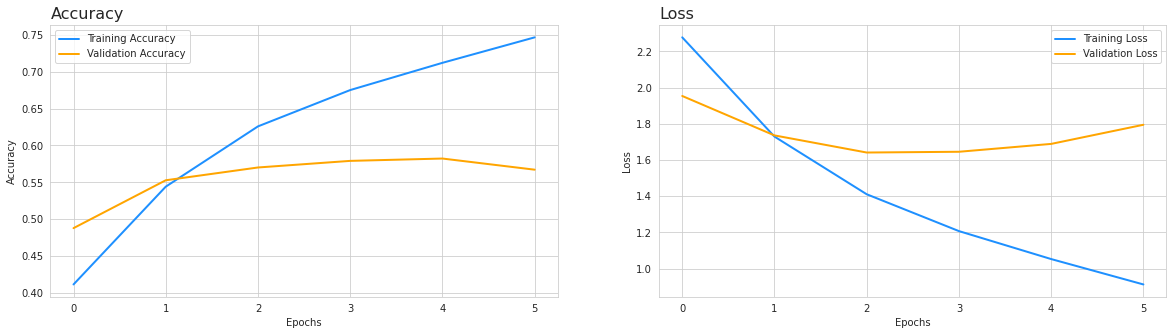

In [56]:
# Plotting the history of the model
plot_history(history)

Finally, An interesting step is to plot the confusion matrix of the validation text. This information will tell us how good the model is performing on unseen data.

The overall training accuracy is: 0.5622269379603045


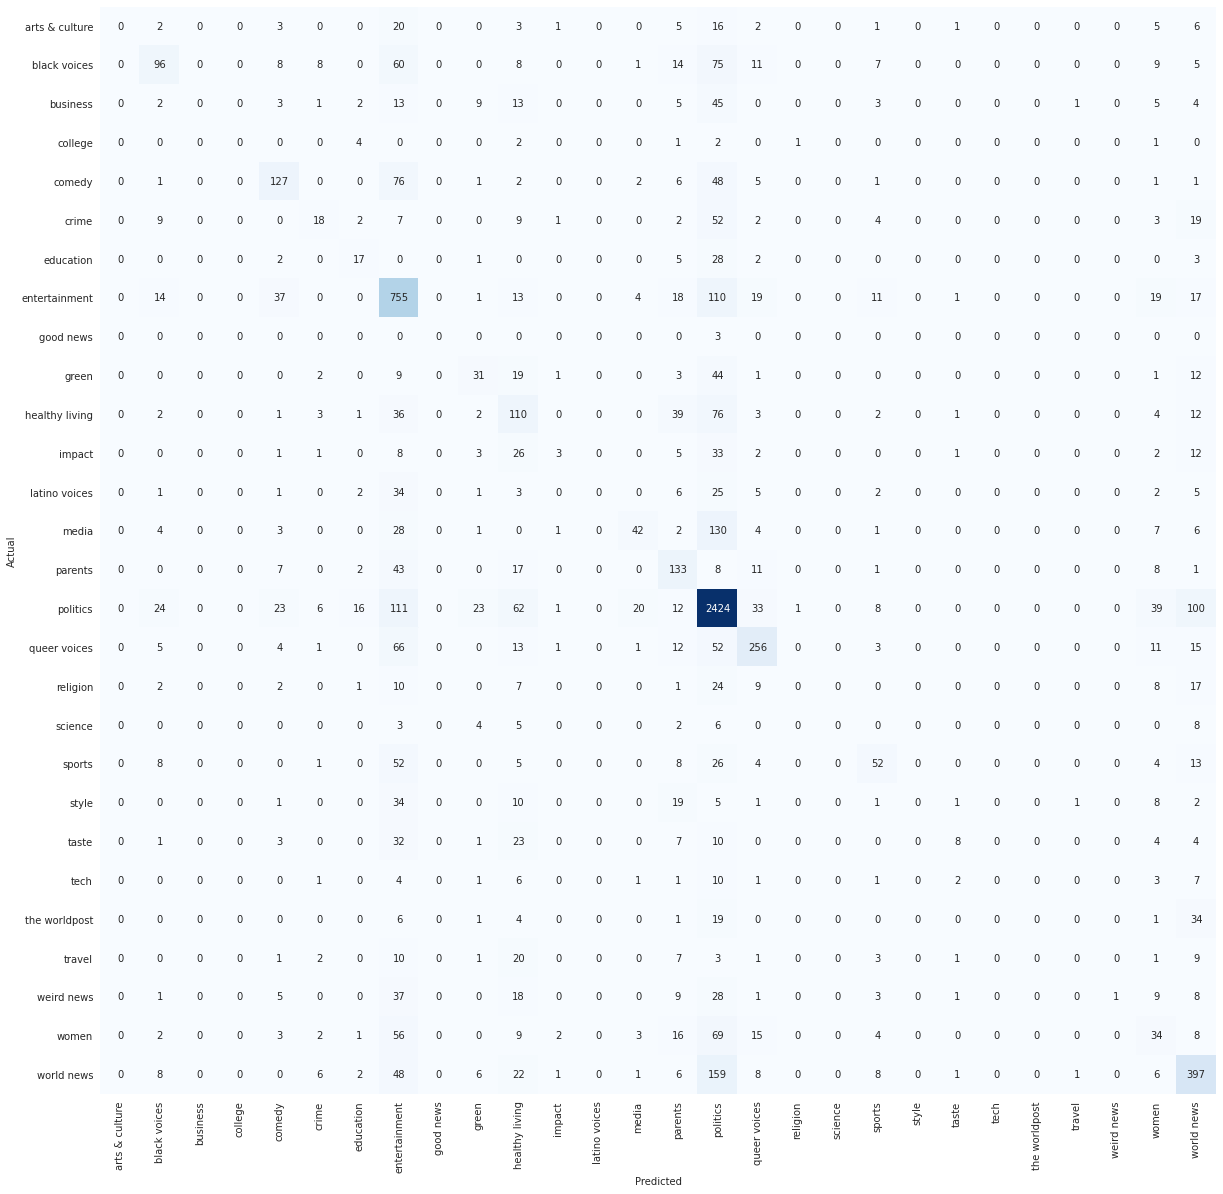

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Confusion matrix
# label_encoder.classes_ show the classes encoded
print('The overall training accuracy is: {}'.format(accuracy_score(pred_val, validation_labels)))
plot_cmatrix(pred_val, label_encoder.classes_, 20, validation_labels)

In [36]:
# Printing all the metrics
print(classification_report(pred_val, validation_labels, target_names = label_encoder.classes_))

                precision    recall  f1-score   support

arts & culture       0.00      0.00      0.00         0
  black voices       0.32      0.53      0.40       182
      business       0.00      0.00      0.00         0
       college       0.00      0.00      0.00         0
        comedy       0.47      0.54      0.50       235
         crime       0.14      0.35      0.20        52
     education       0.29      0.34      0.31        50
 entertainment       0.74      0.48      0.59      1558
     good news       0.00      0.00      0.00         0
         green       0.25      0.36      0.30        87
healthy living       0.38      0.26      0.31       429
        impact       0.03      0.25      0.06        12
 latino voices       0.00      0.00      0.00         0
         media       0.18      0.56      0.28        75
       parents       0.58      0.39      0.46       345
      politics       0.83      0.69      0.75      3530
  queer voices       0.58      0.65      0.61  

/home/sherlock/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Besides the last metrics, I wanted to see the number of good classifications per class, to do so the following cell print the results.

In [37]:
class_correct = list(0. for i in range(len(np.unique(labels))))
class_total = list(0. for i in range(len(np.unique(labels))))

for i in range(len(validation_labels)):
    # current target's label
    label = validation_labels[i]
    if validation_labels[i] == pred_val[i]:
        class_correct[label] += 1
    # Sum label
    class_total[label] += 1
        
for i in range(len(np.unique(labels))):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(label_encoder.classes_[i]), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

Test Accuracy of arts & culture:  0% ( 0/65)
Test Accuracy of black voices: 31% (96/302)
Test Accuracy of business:  0% ( 0/106)
Test Accuracy of college:  0% ( 0/11)
Test Accuracy of comedy: 46% (127/271)
Test Accuracy of crime: 14% (18/128)
Test Accuracy of education: 29% (17/58)
Test Accuracy of entertainment: 74% (755/1019)
Test Accuracy of good news:  0% ( 0/ 3)
Test Accuracy of green: 25% (31/123)
Test Accuracy of healthy living: 37% (110/292)
Test Accuracy of impact:  3% ( 3/97)
Test Accuracy of latino voices:  0% ( 0/87)
Test Accuracy of media: 18% (42/229)
Test Accuracy of parents: 57% (133/231)
Test Accuracy of politics: 83% (2424/2903)
Test Accuracy of queer voices: 58% (256/440)
Test Accuracy of religion:  0% ( 0/81)
Test Accuracy of science:  0% ( 0/28)
Test Accuracy of sports: 30% (52/173)
Test Accuracy of style:  0% ( 0/83)
Test Accuracy of taste:  8% ( 8/93)
Test Accuracy of  tech:  0% ( 0/38)
Test Accuracy of the worldpost:  0% ( 0/66)
Test Accuracy of travel:  0% ( 0/

## Second point

To analize the writing style of the authors, I will use a bag of words. With this bag of words I pretend to analize the top 10 most used words by author and thus give a insights.

First of all, I will list all the authors in the dataframe.

In [38]:
# Make a copy of the dataset
category_df = f_articles.copy()

print('The Authors in the dataset are: \n')
categories = category_df.category.unique()
print(categories)
print('The total number of features are: {}'.format(len(categories)))

The Authors in the dataset are: 

['healthy living' 'queer voices' 'world news' 'politics' 'entertainment'
 'comedy' 'black voices' 'green' 'impact' 'latino voices' 'business'
 'women' 'weird news' 'taste' 'crime' 'media' 'parents' 'travel'
 'arts & culture' 'tech' 'education' 'sports' 'religion' 'science' 'style'
 'the worldpost' 'college' 'good news']
The total number of features are: 28


Due to the inmense volume of authors in the dataset, I will use a wordCloud to show the most common authors.

In [39]:
# counting unique items
#item_counts = f_articles["authors"].value_counts()
item_counts = category_df[["category"]].value_counts(sort=True).reset_index()
# Drop annoyng index
item_counts = item_counts.drop([1])
print(item_counts[:10])

          category     0
0         politics  8797
2       world news  2061
3     queer voices  1332
4     black voices   916
5   healthy living   886
6           comedy   821
7          parents   699
8            media   694
9            women   678
10          sports   525


In [40]:
cat_df = category_ngram('politics', 1, category_df, 'category', 'full_text')
cat_tuple = [tuple(x) for x in cat_df.values]
print(cat_df)

       index  frequency
0      trump       4634
1        say       1985
2  president        971
3      state        838
4     donald        833
5      house        828
6         us        780
7      white        724
8        new        721
9        gop        634


Showing a single Word cloud for a particular category

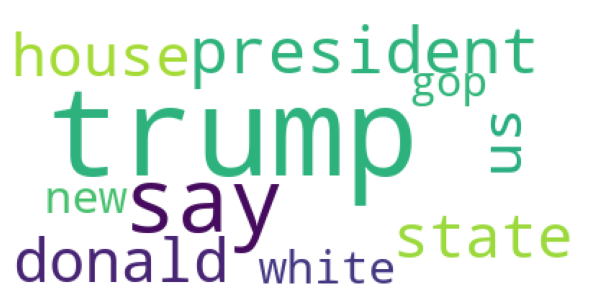

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words = 200, background_color ='white', stopwords = stop_words).generate_from_frequencies(dict(cat_tuple))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Show wordclouds for the 12 more frequent categories

/home/sherlock/Desktop/whale_jaguar_test/utils.py:75: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



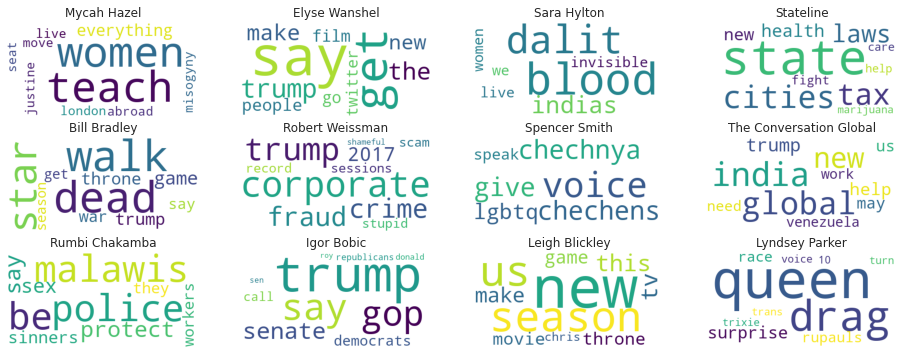

In [43]:
display_wordcloud(category_df,stop_words, 12)